# Phase 3







## SQL Operations







#### Note: Create a separate table for each file and give a meaningful name.







When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.







3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table







3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year







3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year







3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table







3.5	Write SQL query to find the highest number of dacoity/robbery in which district.







3.6	Write SQL query to find in which districts(All) the lowest number of murders happened







3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.







3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table







3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.







3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.







3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
import warnings 
warnings.filterwarnings('ignore')

In [2]:
!pip install ipython-sql 

Defaulting to user installation because normal site-packages is not writeable


####  <span style="color:red"> 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [3]:
conn = sqlite3.connect('crime_against_women.db')
conn.execute("DROP TABLE IF EXISTS CRIME")

In [4]:
conn = sqlite3.connect('crime_against_women.db')
conn.execute('''CREATE TABLE CRIME
             ("STATE/UT" TEXT, DISTRICT TEXT, Year INTEGER, Rape INTEGER,
             Kidnapping_and_Abduction INTEGER, Dowry_Deaths INTEGER,
             Assault_on_women_with_intent_to_outrage_her_modesty INTEGER,
             Insult_to_modesty_of_Women INTEGER,
             Cruelty_by_Husband_or_his_Relatives INTEGER,
             Importation_of_Girls INTEGER)''')


In [5]:
csv_file_path = r'C:\Users\RANJAN\Downloads\India_Crime - Copy Capstone\42_District_wise_crimes_committed_against_women_2001_2012.csv'

with open(csv_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        conn.execute("INSERT INTO CRIME ('STATE/UT', DISTRICT, Year, Rape, Kidnapping_and_Abduction, Dowry_Deaths, Assault_on_women_with_intent_to_outrage_her_modesty, Insult_to_modesty_of_Women, Cruelty_by_Husband_or_his_Relatives, Importation_of_Girls) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)",
                     (row['STATE/UT'], row['DISTRICT'], row['Year'], row['Rape'], row['Kidnapping and Abduction'], row['Dowry Deaths'], row['Assault on women with intent to outrage her modesty'], row['Insult to modesty of Women'], row['Cruelty by Husband or his Relatives'], row['Importation of Girls']))
    
    conn.commit()


In [6]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM CRIME')
rows = cursor.fetchall()

for row in rows:
    print(row)


('A & N ISLANDS', 'ANDAMAN', 2001, 3, 2, 0, 18, 1, 9, 0)
('A & N ISLANDS', 'NICOBAR', 2001, 0, 0, 0, 1, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2001, 3, 2, 0, 19, 1, 9, 0)
('A & N ISLANDS', 'ANDAMAN', 2002, 1, 1, 0, 16, 3, 4, 0)
('A & N ISLANDS', 'NICOBAR', 2002, 1, 0, 0, 1, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2002, 2, 1, 0, 17, 3, 4, 0)
('A & N ISLANDS', 'ANDAMAN', 2003, 2, 2, 0, 9, 2, 7, 0)
('A & N ISLANDS', 'NICOBAR', 2003, 0, 0, 0, 0, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2003, 2, 2, 0, 9, 2, 7, 0)
('A & N ISLANDS', 'ANDAMAN', 2004, 10, 3, 0, 5, 3, 5, 0)
('A & N ISLANDS', 'NICOBAR', 2004, 0, 0, 0, 1, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2004, 10, 3, 0, 6, 3, 5, 0)
('A & N ISLANDS', 'ANDAMAN', 2005, 4, 1, 0, 10, 1, 5, 0)
('A & N ISLANDS', 'NICOBAR', 2005, 0, 0, 0, 1, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2005, 4, 1, 0, 11, 1, 5, 0)
('A & N ISLANDS', 'ANDAMAN', 2006, 6, 5, 0, 12, 4, 7, 0)
('A & N ISLANDS', 'NICOBAR', 2006, 0, 0, 0, 2, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2006, 6, 5, 0, 14, 4, 

#### <span style="color:red"> 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [7]:
cursor.execute('''
    SELECT "STATE/UT", DISTRICT, Year, Rape, Kidnapping_and_Abduction
    FROM CRIME
    WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL'
    ORDER BY Rape DESC, Kidnapping_and_Abduction DESC
    LIMIT 1
''')
result_max = cursor.fetchone()
state_max, district_max, year_max, rapes_max, kidnappings_max = result_max
print(f"Highest number of rapes and kidnappings occurred in {state_max}, {district_max}, Year {year_max}.")
print(f"Number of rapes: {rapes_max}, Number of kidnappings: {kidnappings_max}")


Highest number of rapes and kidnappings occurred in WEST BENGAL, MURSHIDABAD, Year 2009.
Number of rapes: 568, Number of kidnappings: 342


#### <span style="color:red"> 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [8]:
lowest = cursor.execute('''
    SELECT "STATE/UT", DISTRICT, Year, Rape, Kidnapping_and_Abduction
    FROM CRIME
    WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' AND Rape == 0 AND Kidnapping_and_Abduction == 0
    ORDER BY Year
''')
print("\nAll the lowest number of rapes and kidnappings:")
for row in lowest:
    print(row)


All the lowest number of rapes and kidnappings:
('A & N ISLANDS', 'NICOBAR', 2001, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0, 0)
('ASSAM', 'C.I.D.', 2001, 0, 0)
('BIHAR', 'ARWAL', 2001, 0, 0)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0, 0)
('DAMAN & DIU', 'DIU', 2001, 0, 0)
('DELHI', 'S.T.F.', 2001, 0, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0, 0)
('JAMMU & KASHMIR', 'RAILWAYS', 2001, 0, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0, 0)
('MADHYA PRADESH', 'JABALPUR RLY.', 2001, 0, 0)
('MAHARASHTRA', 'PUNE RLY.', 2001, 0, 0)
('MANIPUR', 'SENAPATI', 2001, 0, 0)
('MANIPUR', 'TAMENGLONG', 2001, 0, 0)
('MIZORAM', 'MAMIT', 2001, 0, 0)
('NAGALAND', 'KIPHIRE', 2001, 0, 0)
('NAGALAND', 'PEREN', 2001, 0, 0)
('NAGALAND', 'TUENSANG', 2001, 0, 0)
('PUNJAB', 'G.R.P', 2001, 0, 0)
('SIKKIM', 'NORTH', 2001, 0, 0)
('TAMIL NADU', 'CHENNAI RLY.', 2001, 0, 0)


#### <span style="color:red">  3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [9]:
conn = sqlite3.connect('crime_against_ST.db')
conn.execute("DROP TABLE IF EXISTS CRIME_ST")

In [10]:
conn = sqlite3.connect('crime_against_ST.db')
conn.execute('''CREATE TABLE CRIME_ST ("STATE/UT" TEXT,DISTRICT TEXT,Year INTEGER,
Murder INTEGER,Rape INTEGER,Kidnapping_and_Abduction INTEGER,Dacoity INTEGER,
Robbery INTEGER,Arson INTEGER,Hurt INTEGER,"Protection_of_Civil_Rights_(PCR)_Act" INTEGER,
"Prevention_of_Atrocities_(POA)_Act" INTEGER,"Other_Crimes_Against_STs" INTEGER)''')



In [11]:
csv_file_path = r"C:\Users\RANJAN\Downloads\India_Crime - Copy Capstone\02_District_wise_crimes_committed_against_ST_2001_2012.csv"
with open(csv_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    
    # Print column names
    print(reader.fieldnames)

    for row in reader:
        conn.execute("INSERT INTO CRIME_ST ('STATE/UT', DISTRICT, Year, Murder, Rape, Kidnapping_and_Abduction, Dacoity, Robbery, Arson, Hurt, 'Protection_of_Civil_Rights_(PCR)_Act', 'Prevention_of_Atrocities_(POA)_Act', 'Other_Crimes_Against_STs') VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)",
                     (row['STATE/UT'], row['DISTRICT'], row['Year'], row['Murder'], row['Rape'], row['Kidnapping and Abduction'], row['Dacoity'], row['Robbery'], row['Arson'], row['Hurt'], row['Protection of Civil Rights (PCR) Act'], row['Prevention of atrocities (POA) Act'], row['Other Crimes Against STs']))
    
    conn.commit()


['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Protection of Civil Rights (PCR) Act', 'Prevention of atrocities (POA) Act', 'Other Crimes Against STs', 'Total crimes against STs']


In [12]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM CRIME_ST')
rows = cursor.fetchall()

for row in rows:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
('A & N ISLANDS', 'TOTAL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
('A & N ISLANDS', 'ANDAMAN', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
('A & N ISLANDS', 'NICOBAR', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
('A & N ISLANDS', 'ANDAMAN', 2003, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2003, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)
('A & N ISLANDS', 'ANDAMAN', 2004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
('A & N ISLANDS', 'TOTAL', 2004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
('A & N ISLANDS', 'ANDAMAN', 2005, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1)
('A & N ISLANDS', 'NICOBAR', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2005, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1)
('A & N ISLANDS', 'ANDAMAN', 2006, 

('MAHARASHTRA', 'NASIK RURAL', 2005, 0, 3, 0, 0, 0, 0, 1, 0, 4, 7)
('MAHARASHTRA', 'NAVI MUMBAI', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
('MAHARASHTRA', 'OSMANABAD', 2005, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4)
('MAHARASHTRA', 'PARBHANI', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('MAHARASHTRA', 'PUNE COMMR.', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('MAHARASHTRA', 'PUNE RLY.', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('MAHARASHTRA', 'PUNE RURAL', 2005, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1)
('MAHARASHTRA', 'RAIGAD', 2005, 2, 0, 0, 0, 1, 0, 0, 0, 4, 4)
('MAHARASHTRA', 'RATNAGIRI', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('MAHARASHTRA', 'SANGLI', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('MAHARASHTRA', 'SATARA', 2005, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('MAHARASHTRA', 'SINDHUDURG', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('MAHARASHTRA', 'SOLAPUR COMMR.', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
('MAHARASHTRA', 'SOLAPUR RURAL', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('MAHARASHTRA', 'THANE COMMR.', 2005, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8)
('MAHARASHTRA',

#### <span style="color:red">  3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

In [13]:
cursor.execute('''
    SELECT "STATE/UT", DISTRICT, Year, Dacoity, Robbery
    FROM CRIME_ST
    WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL'
    ORDER BY Dacoity DESC, Robbery DESC
    LIMIT 1
''')
result_max = cursor.fetchone()
state_max, district_max, year_max, dacoity_max, robbery_max = result_max
print(f"Highest number of dacoity and robbery occurred in {state_max}, {district_max}, Year {year_max}.")
print(f"Number of dacoity: {dacoity_max}, Number of robbery: {robbery_max}")


Highest number of dacoity and robbery occurred in GUJARAT, DAHOD, Year 2004.
Number of dacoity: 29, Number of robbery: 31


#### <span style="color:red">  3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [14]:
lowest_murders = cursor.execute('''
    SELECT "STATE/UT", DISTRICT, Year, Murder
    FROM CRIME
    WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL'AND Murder==0
    ORDER BY Year
''')

print("\nDistricts with the lowest number of murders:")
for row in lowest_murders:
    print(row)



Districts with the lowest number of murders:
('ANDHRA PRADESH', 'ADILABAD', 2001, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 0)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 0)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0)
('ANDHRA PRADESH', 'SRIKAKULAM', 2001, 0)
('ANDHRA PRADESH', 'VIJAYAWADA', 2001, 0)
('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2001, 0)
('ANDHRA PRADESH', 'VISAKHA RURAL', 2001, 0)
('ANDHRA PRADESH', 'VISAKHAPATNAM', 2001, 0)
('ANDHRA PRADESH', 'VIZIANAGARAM', 2001, 0)
('ANDHRA PRADESH', 'WAR

#### <span style="color:red"> 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise

In [15]:
lowest_murders = cursor.execute('''
    SELECT "STATE/UT", DISTRICT, Year, Murder
    FROM CRIME
    WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL'
    ORDER BY District ASC, Year ASC
''')

print("\nNumber of murders in ascending order in district and yearwise:")
for row in lowest_murders:
    print(row)



Number of murders in ascending order in district and yearwise:
('WEST BENGAL', '24 PARGANAS NORTH', 2001, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2002, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2003, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2004, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2005, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2006, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2007, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2008, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2009, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2010, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2011, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2012, 0)
('WEST BENGAL', '24 PARGANAS SOUTH', 2001, 0)
('WEST BENGAL', '24 PARGANAS SOUTH', 2002, 0)
('WEST BENGAL', '24 PARGANAS SOUTH', 2003, 0)
('WEST BENGAL', '24 PARGANAS SOUTH', 2004, 0)
('WEST BENGAL', '24 PARGANAS SOUTH', 2005, 0)
('WEST BENGAL', '24 PARGANAS SOUTH', 2006, 0)
('WEST BENGAL', '24 PARGANAS SOUTH', 2007, 0)
('WEST BENGAL', '24 PARGANAS SOUTH', 2008, 0)
('WEST BENGAL', 

#### <span style="color:red"> 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [16]:
conn = sqlite3.connect('district_wise_crimes.db')
conn.execute("DROP TABLE IF EXISTS DISTRICT_WISE_CRIME")

In [17]:
conn = sqlite3.connect('district_wise_crimes.db')
conn.execute('''CREATE TABLE DISTRICT_WISE_CRIME
             ("STATE/UT" TEXT, DISTRICT TEXT, Year INTEGER,MURDER INTEGER,ATTEMPT_TO_MURDER INTEGER, Rape INTEGER)
             ''')


In [18]:
csv_file_path = r"C:\Users\RANJAN\Downloads\India_Crime - Copy Capstone\01_District_wise_crimes_committed_IPC_2001_2012.csv"

with open(csv_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        conn.execute(
            '''INSERT INTO DISTRICT_WISE_CRIME ("STATE/UT", DISTRICT, Year, MURDER, ATTEMPT_TO_MURDER, Rape)
               VALUES (?, ?, ?, ?, ?, ?)''',
            (row['STATE/UT'], row['DISTRICT'], row['YEAR'], row['MURDER'], row['ATTEMPT TO MURDER'], row['RAPE'])
        )

conn.commit()


In [19]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM DISTRICT_WISE_CRIME')
rows = cursor.fetchall()

for row in rows:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 2001, 13, 0, 3)
('A & N ISLANDS', 'NICOBAR', 2001, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2001, 13, 0, 3)
('A & N ISLANDS', 'ANDAMAN', 2002, 14, 3, 1)
('A & N ISLANDS', 'NICOBAR', 2002, 3, 0, 1)
('A & N ISLANDS', 'TOTAL', 2002, 17, 3, 2)
('A & N ISLANDS', 'ANDAMAN', 2003, 16, 4, 2)
('A & N ISLANDS', 'NICOBAR', 2003, 5, 0, 0)
('A & N ISLANDS', 'TOTAL', 2003, 21, 4, 2)
('A & N ISLANDS', 'ANDAMAN', 2004, 13, 1, 10)
('A & N ISLANDS', 'NICOBAR', 2004, 2, 0, 0)
('A & N ISLANDS', 'TOTAL', 2004, 15, 1, 10)
('A & N ISLANDS', 'ANDAMAN', 2005, 14, 3, 4)
('A & N ISLANDS', 'NICOBAR', 2005, 0, 0, 0)
('A & N ISLANDS', 'TOTAL', 2005, 14, 3, 4)
('A & N ISLANDS', 'ANDAMAN', 2006, 3, 4, 6)
('A & N ISLANDS', 'NICOBAR', 2006, 1, 0, 0)
('A & N ISLANDS', 'TOTAL', 2006, 4, 4, 6)
('A & N ISLANDS', 'A and N ISLANDS', 2007, 15, 19, 3)
('A & N ISLANDS', 'TOTAL', 2007, 15, 19, 3)
('A & N ISLANDS', 'ANDAMAN', 2008, 8, 10, 12)
('A & N ISLANDS', 'NICOBAR', 2008, 0, 1, 0)
('A & N ISLANDS', 'T

#### <span style="color:red"> 3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [20]:
highest_murders = cursor.execute('''
    SELECT "STATE/UT", Year, DISTRICT, MAX(MURDER) as MURDERS
    FROM DISTRICT_WISE_CRIME
    WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL'
    GROUP BY "STATE/UT", Year
    ORDER BY "STATE/UT", Year
''')

print("\nDistricts with the highest number of murders:")
for row in highest_murders:
    print(row)



Districts with the highest number of murders:
('A & N ISLANDS', 2001, 'ANDAMAN', 13)
('A & N ISLANDS', 2002, 'ANDAMAN', 14)
('A & N ISLANDS', 2003, 'ANDAMAN', 16)
('A & N ISLANDS', 2004, 'ANDAMAN', 13)
('A & N ISLANDS', 2005, 'ANDAMAN', 14)
('A & N ISLANDS', 2006, 'ANDAMAN', 3)
('A & N ISLANDS', 2007, 'A and N ISLANDS', 15)
('A & N ISLANDS', 2008, 'ANDAMAN', 8)
('A & N ISLANDS', 2009, 'ANDAMAN', 15)
('A & N ISLANDS', 2010, 'ANDAMAN', 8)
('A & N ISLANDS', 2011, 'ANDAMAN', 14)
('A & N ISLANDS', 2012, 'SOUTH', 8)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('ANDHRA PRADESH', 2002, 'RANGA REDDY', 214)
('ANDHRA PRADESH', 2003, 'GUNTUR', 210)
('ANDHRA PRADESH', 2004, 'MAHABOOBNAGAR', 183)
('ANDHRA PRADESH', 2005, 'MAHABOOBNAGAR', 212)
('ANDHRA PRADESH', 2006, 'CYBERABAD', 193)
('ANDHRA PRADESH', 2007, 'CYBERABAD', 186)
('ANDHRA PRADESH', 2008, 'CYBERABAD', 197)
('ANDHRA PRADESH', 2009, 'CYBERABAD', 186)
('ANDHRA PRADESH', 2010, 'CYBERABAD', 187)
('ANDHRA PRADESH', 2011, 'CYBERABAD', 213)
(

####  <span style="color:red"> 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [35]:
district_counts = data1[data1['MURDERS'] > 0]['DISTRICT'].value_counts()
selected_districts = district_counts[district_counts >= 3].index
filtered_data = data1[(data1['DISTRICT'].isin(selected_districts)) & (data1['MURDERS'] > 0)]
sorted_data = filtered_data.sort_values(by=['STATE/UT', 'Year', 'MURDERS'], ascending=[True, False, False])
data2 = pd.DataFrame(sorted_data)
data2 = data2.reset_index(drop=True)
data2


,STATE/UT,Year,DISTRICT,MURDERS
0,A & N ISLANDS,2011,ANDAMAN,14
1,A & N ISLANDS,2010,ANDAMAN,8
2,A & N ISLANDS,2009,ANDAMAN,15
3,A & N ISLANDS,2008,ANDAMAN,8
4,A & N ISLANDS,2006,ANDAMAN,3
...,...,...,...,...
346,WEST BENGAL,2005,24 PARGANAS NORTH,168
347,WEST BENGAL,2004,24 PARGANAS NORTH,177
348,WEST BENGAL,2003,24 PARGANAS NORTH,193
349,WEST BENGAL,2002,24 PARGANAS NORTH,204


#### 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

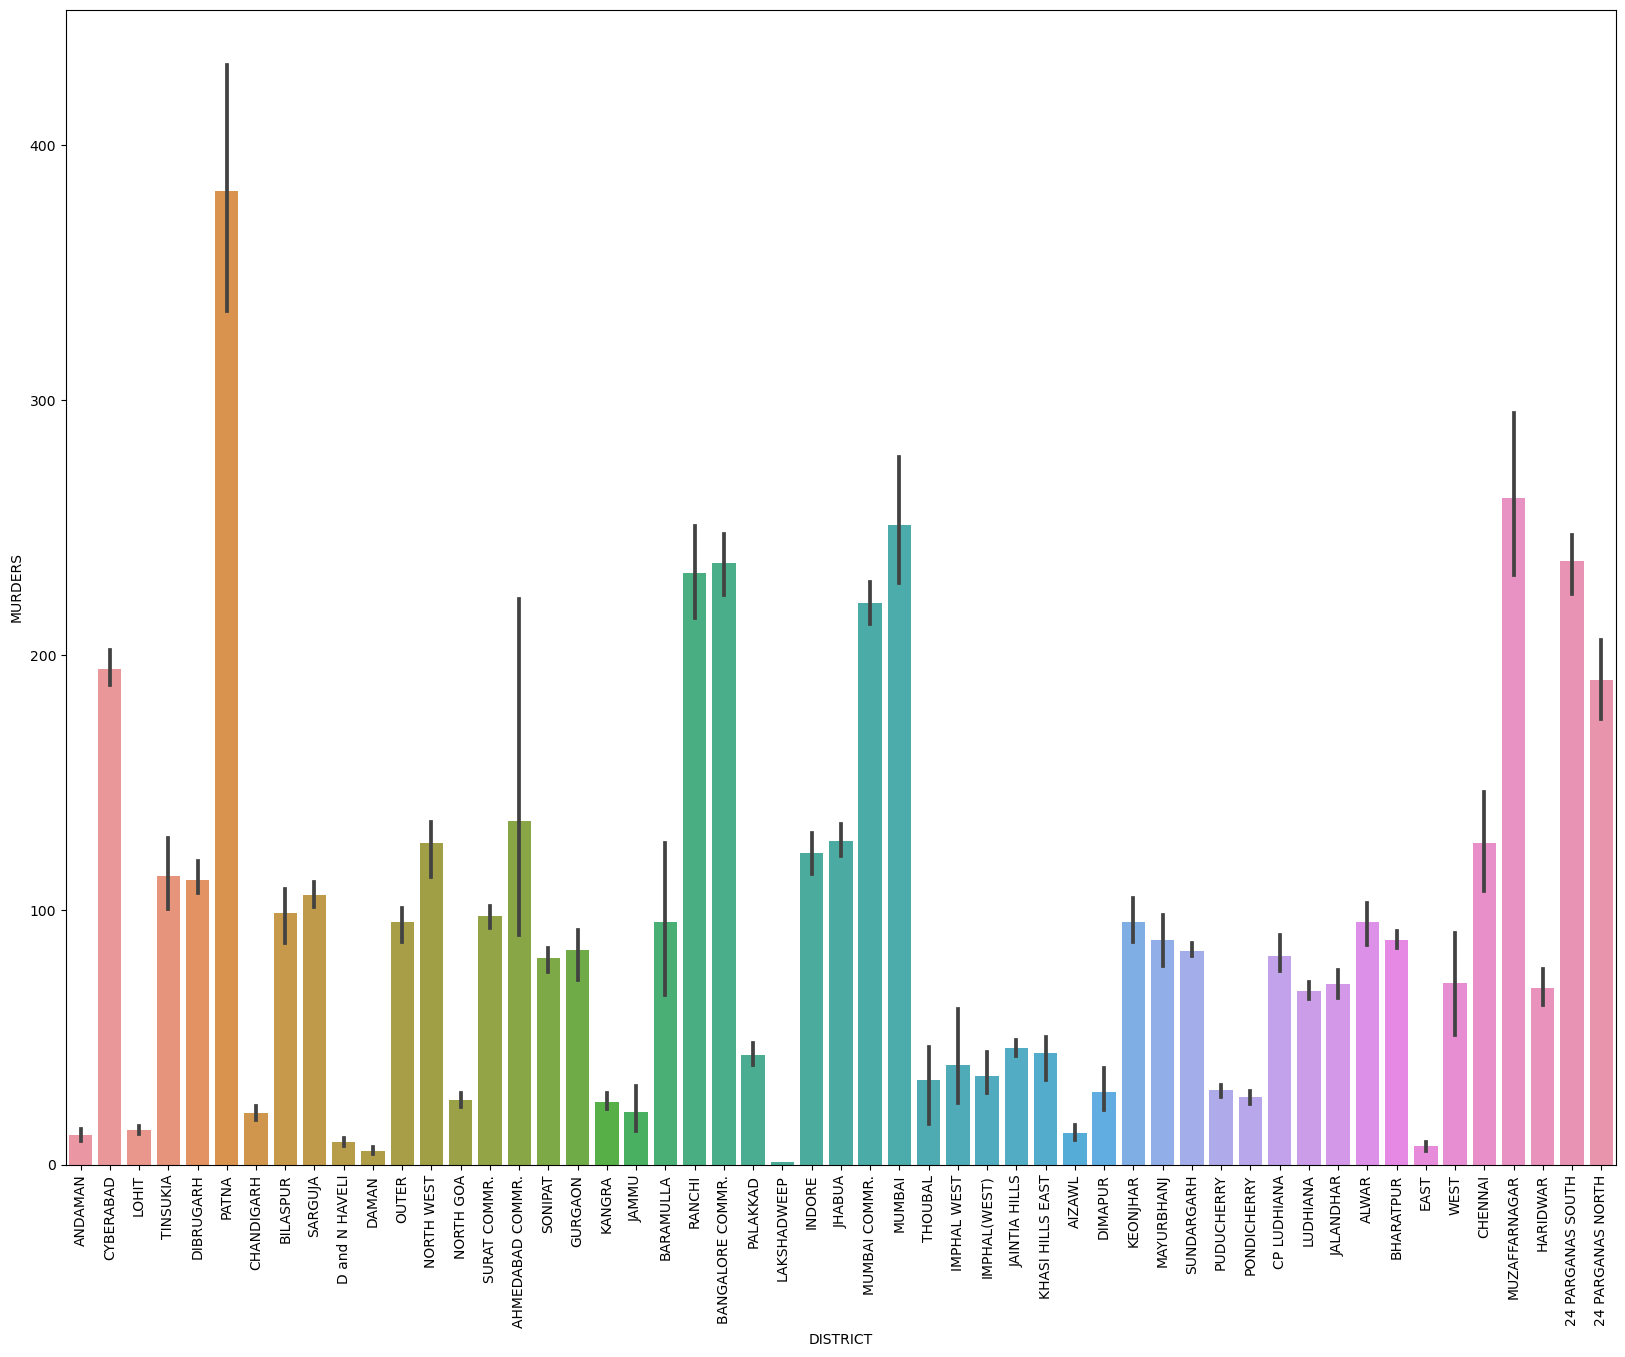

In [45]:

plt.figure(figsize=(20,15))
sns.barplot(x=data2['DISTRICT'], y=data2['MURDERS'])
plt.xticks(rotation='90')
plt.show()

here we can conclude that Patana has highest number of murders 

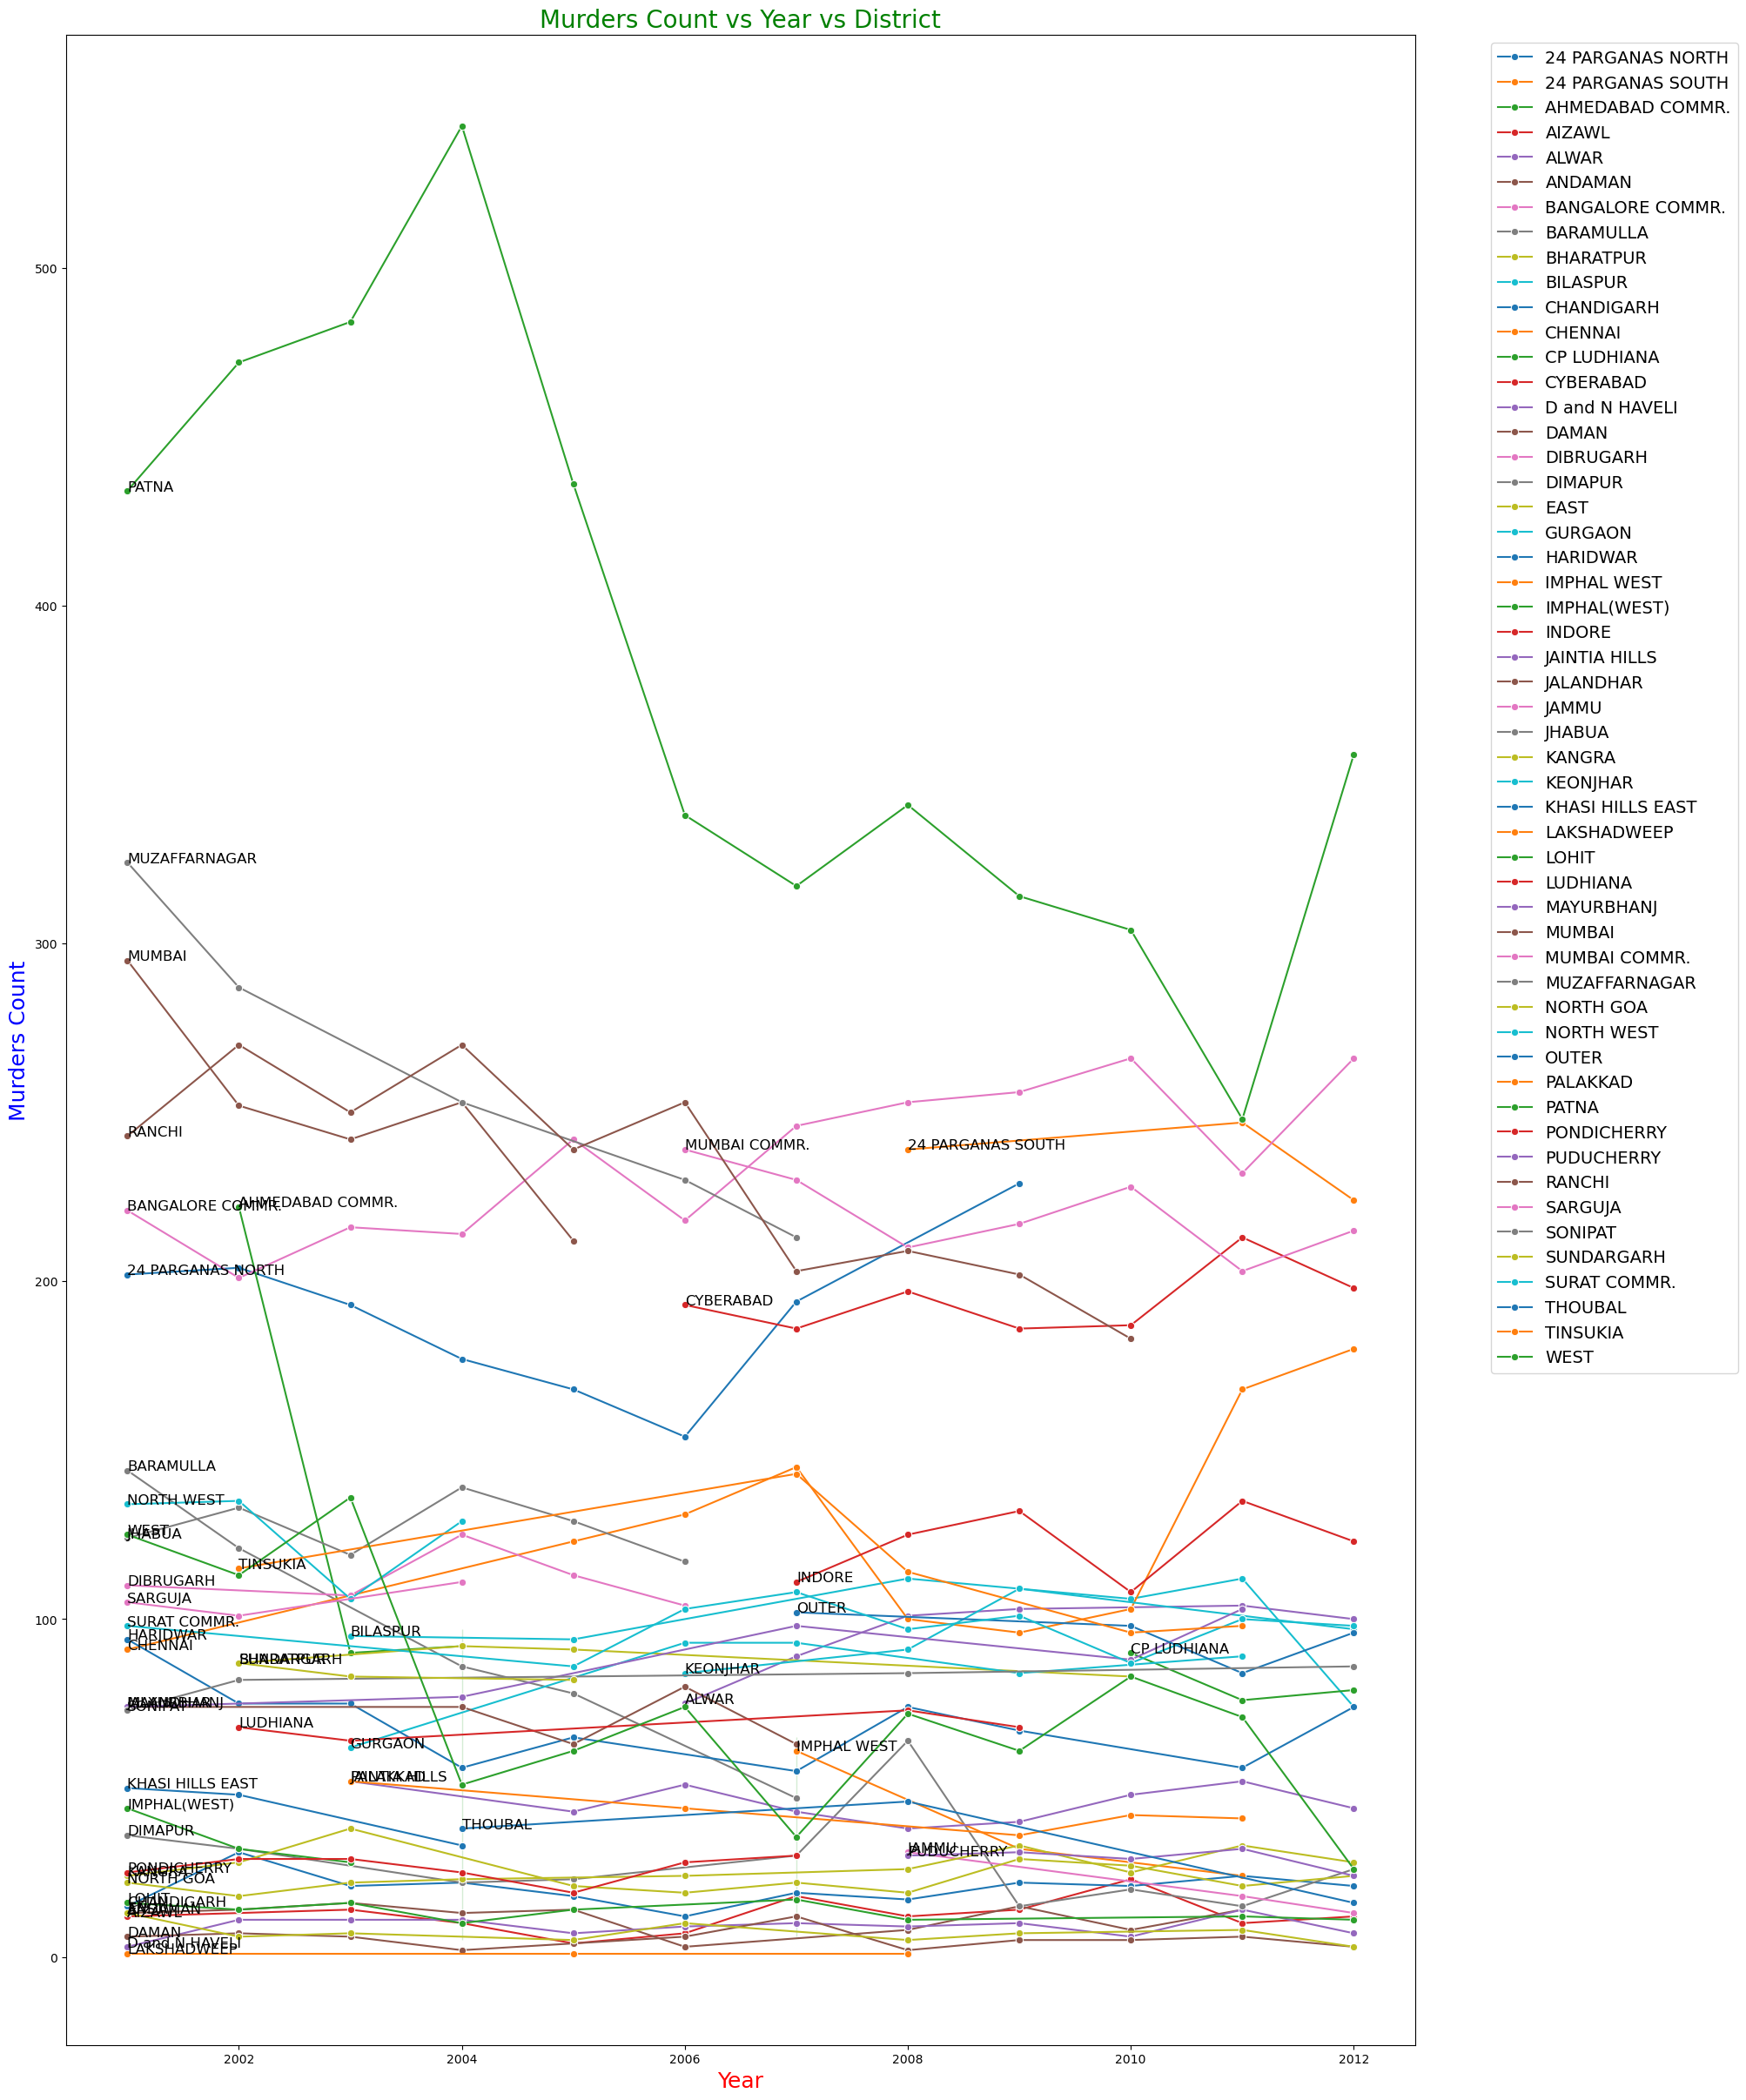

In [61]:
plt.figure(figsize=(20, 30))

for district, data in data2.groupby('DISTRICT'):
    sns.lineplot(x='Year', y='MURDERS', data=data, label=district, marker='o')
    plt.text(data['Year'].iloc[-1], data['MURDERS'].iloc[-1], district, fontsize=12, color='black')

plt.xlabel('Year', fontsize=18, color='red')
plt.ylabel('Murders Count', fontsize=18, color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.title('Murders Count vs Year vs District', fontsize=20, color='green')
plt.show()


here we can see yearwise  murders in distrcts 

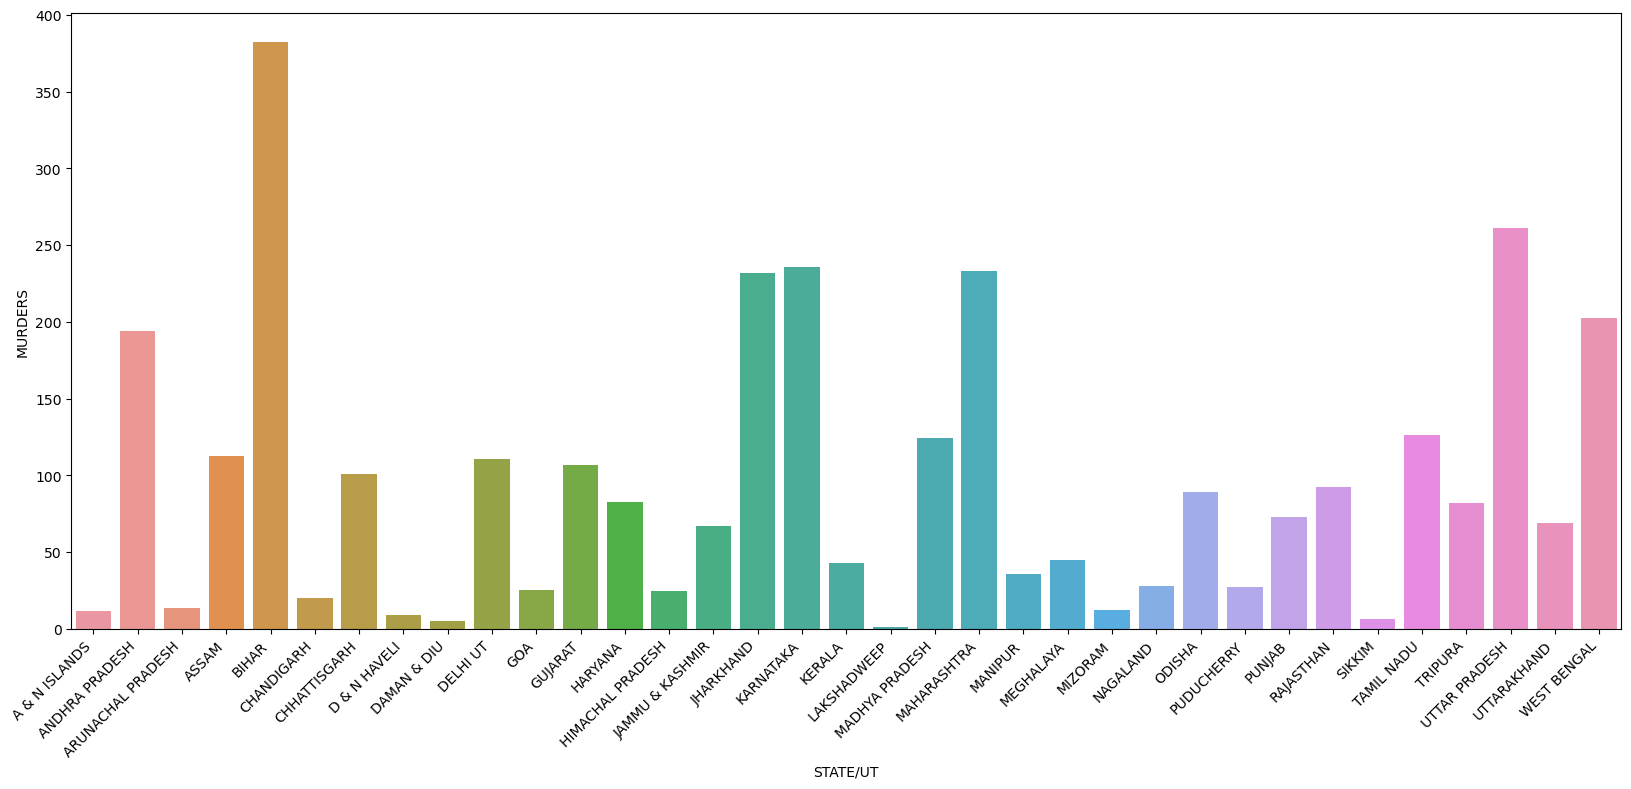

In [47]:
plt.figure(figsize=(20, 8))
sns.barplot(x='STATE/UT', y='MURDERS', data=data2, ci=None)
plt.xticks(rotation='45', ha='right')
plt.show()


here we can see that biahr has highest muders 

<h1 align="center"><span style="color: #00FF00;"><u>PHASE III COMPLETED</u></span></h1>
